In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from ydata_profiling import ProfileReport

C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [63]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/shopping-data.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [65]:
pf = ProfileReport(data)
pf.to_file("쇼핑.html")

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 199.92it/s]


# 계층적 군집 분석
* 비지도 학습
* 데이터가 적을 경우 사용
* 거리 계산 지표
* 단일연결법(최소연결법)
* 완전연결법(최장연결법)
* 평균연결법
* 중심연결법
* 와드연결법
* 덴드로그램으로 계층적 군집 시각화

In [66]:
import scipy.cluster.hierarchy as shc

In [67]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


In [68]:
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False
...,...,...,...,...,...
195,196,35,120,79,False
196,197,45,126,28,False
197,198,32,126,74,True
198,199,32,137,18,True


In [69]:
data2 = data.iloc[:, 3:5]

In [70]:
plt.switch_backend('TkAgg')

In [71]:
plt.figure(figsize=(30, 10))
plt.title("Customer Dendrograms_single")
dend = shc.dendrogram(shc.linkage(data2, method='single'))
plt.show()

In [72]:
plt.figure(figsize=(30, 10))
plt.title("Customer Dendrograms_complete")
dend = shc.dendrogram(shc.linkage(data2, method='complete'))
plt.show()

In [73]:
plt.figure(figsize=(30, 10))
plt.title("Customer Dendrograms_average")
dend = shc.dendrogram(shc.linkage(data2, method='average'))
plt.show()

In [74]:
plt.figure(figsize=(30, 10))
plt.title("Customer Dendrograms_centroid")
dend = shc.dendrogram(shc.linkage(data2, method='centroid'))
plt.show()

In [75]:
plt.figure(figsize=(30, 10))
plt.title("Customer Dendrograms_ward")
dend = shc.dendrogram(shc.linkage(data2, method='ward'))
plt.show()

In [76]:
dend

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [122.5, 122.5, 152.5, 152.5],
  [100.0, 100.0, 137.5, 137.5],
  [72.5, 72.5, 118.75, 118.75],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [182.5, 182.5, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [250.0, 250.0, 273.75, 273.75],
  [201.25, 201.25, 261.875, 261.875],
  [95.625, 95.625, 231.5625, 231.5625],
  [27.5, 27.5, 163.59375, 163.59375],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0

In [77]:
data2 = data.iloc[:, 3:5].values
data2[:3]

array([[39, True],
       [81, True],
       [6, False]], dtype=object)

In [78]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
result = cluster.fit_predict(data2)
plt.figure(figsize=(10,5))
plt.scatter(data2[:,0], data2[:,1], c=cluster.labels_, cmap='rainbow')

In [79]:
result

array([0, 3, 2, 4, 0, 4, 2, 3, 2, 4, 2, 3, 2, 4, 2, 4, 0, 4, 0, 3, 0, 4,
       2, 4, 2, 3, 0, 1, 0, 3, 2, 4, 2, 3, 2, 3, 2, 4, 0, 4, 0, 3, 0, 1,
       0, 4, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 3, 0, 4, 0, 3, 2, 4, 2, 4,
       0, 4, 2, 3, 2, 4, 2, 4, 2, 3, 0, 3, 2, 3, 0, 4, 0, 3, 2, 3, 0, 4,
       2, 3, 2, 4, 2, 4, 0, 3, 2, 3, 0, 4, 0, 3, 0, 4, 2, 4, 2, 3, 2, 3,
       2, 4, 2, 3, 0, 3, 2, 3, 0, 3, 0, 4, 2, 3, 0, 4, 2, 3, 2, 4, 0, 4,
       2, 3], dtype=int64)

In [80]:
data['cluster'] = result

In [81]:
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,cluster
0,1,19,15,39,True,0
1,2,21,15,81,True,3
2,3,20,16,6,False,2
3,4,23,16,77,False,4
4,5,31,17,40,False,0
...,...,...,...,...,...,...
195,196,35,120,79,False,4
196,197,45,126,28,False,0
197,198,32,126,74,True,4
198,199,32,137,18,True,2


In [82]:
data[data['cluster']==0]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,cluster
0,1,19,15,39,True,0
4,5,31,17,40,False,0
16,17,35,21,35,False,0
18,19,52,23,29,True,0
20,21,35,24,35,True,0
26,27,45,28,32,False,0
28,29,40,29,31,False,0
38,39,36,37,26,False,0
40,41,65,38,35,False,0
42,43,48,39,36,True,0


In [83]:
data[data['cluster']==1]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,cluster
27,28,35,28,61,True,1
43,44,31,39,61,False,1
46,47,50,40,55,False,1
47,48,27,40,47,False,1
50,51,49,42,52,False,1
...,...,...,...,...,...,...
115,116,19,65,50,False,1
117,118,49,65,59,False,1
119,120,50,67,57,False,1
120,121,27,67,56,True,1


In [84]:
data[data['cluster']==2]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,cluster
2,3,20,16,6,False,2
6,7,35,18,6,False,2
8,9,64,19,3,True,2
10,11,67,19,14,True,2
12,13,58,20,15,False,2
14,15,37,20,13,True,2
22,23,46,25,5,False,2
24,25,54,28,14,False,2
30,31,60,30,4,True,2
32,33,53,33,4,True,2


In [85]:
data[data['cluster']==3]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,cluster
1,2,21,15,81,True,3
7,8,23,18,94,False,3
11,12,35,19,99,False,3
19,20,35,23,98,False,3
25,26,29,28,82,True,3
29,30,23,29,87,False,3
33,34,18,33,92,True,3
35,36,21,33,81,False,3
41,42,24,38,92,True,3
123,124,39,69,91,True,3


In [86]:
data[data['cluster']==4]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,cluster
3,4,23,16,77,False,4
5,6,22,17,76,False,4
9,10,30,19,72,False,4
13,14,24,20,77,False,4
15,16,22,20,79,True,4
17,18,20,21,66,True,4
21,22,25,24,73,True,4
23,24,31,25,73,True,4
31,32,21,30,73,False,4
37,38,30,34,73,False,4


# 비계층적 군집 분석

## K-Means(K평균)을 사용한 군집 분석

* 통신사 고객 이동 데이터 분석
  * 독립변수(Feature) 20개: 회원ID, 성별, 고연령, 배우자, 피부양자, 가입기간, 전화서비스, 2회선이상, 인터넷서비스, 온라인보안, 온라인백업, 기기보호서비스, 기술지원, 스트리밍TV,스트리밍Movies, 약정옵션, 온라인고지서, 지불수단, 월요금, 합산요금
  * 종속변수(target) 1개: 이탈여부

In [12]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/06%EA%B3%A0%EA%B0%9D%EC%9D%B4%ED%83%88%EC%98%88%EC%B8%A1.csv", encoding='cp949')
data.head()

,회원ID,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,...,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
pf = ProfileReport(data)
pf.to_file("통신사고객이탈.html")

Summarize dataset:  81%|██████████████████████████████       | 26/32 [00:13<00:06,  1.06s/it, scatter 가입기간, 월요금]matrix]Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\hi\anaconda3\envs\testenv\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\matplotlib\backends\_backend_tk.py", line 552, in destroy
    Gcf.destroy(self)
  File "C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\matplotlib\_pylab_helpers.py", line 66, in destroy
    manager.destroy()
  File "C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\matplotlib\backends\_backend_tk.py", line 569, in destroy
    self._window_dpi.trace_remove('write', self._window_dpi_cbname)
  File "C:\Users\hi\anaconda3\envs\testenv\lib\tkinter\__init__.py", line 430, in trace_remove
    self._tk.deletecommand(cbname)
_tkinter.TclError: can't delete Tcl command
Summarize dataset:  85%|█████████████████████████████████▎  

Generate report structure:   0%|                                                                 | 0/1 [00:10<?, ?it/s]


KeyboardInterrupt: 

In [13]:
data.head(2)

,회원ID,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,...,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   회원ID        7043 non-null   object 
 1   성별          7043 non-null   object 
 2   고연령         7043 non-null   int64  
 3   배우자         7043 non-null   object 
 4   피부양자        7043 non-null   object 
 5   가입기간        7043 non-null   int64  
 6   전화서비스       7043 non-null   object 
 7   2회선이상       7043 non-null   object 
 8   인터넷서비스      7043 non-null   object 
 9   온라인보안       7043 non-null   object 
 10  온라인백업       7043 non-null   object 
 11  기기보호서비스     7043 non-null   object 
 12  기술지원        7043 non-null   object 
 13  스트리밍TV      7043 non-null   object 
 14  스트리밍Movies  7043 non-null   object 
 15  약정옵션        7043 non-null   object 
 16  온라인고지서      7043 non-null   object 
 17  지불수단        7043 non-null   object 
 18  월요금         7043 non-null   float64
 19  합산요금        7043 non-null  

In [5]:
data['합산요금'] = data['합산요금'].astype(float)

ValueError: could not convert string to float: ''

In [15]:
data['합산요금'].value_counts()

합산요금
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [16]:
na_index = data[data['합산요금'] == " "].index

In [18]:
data['합산요금'] = data.apply(lambda x: x['월요금'] if x['합산요금'] == " " else x['합산요금'], axis=1)

In [19]:
data.loc[na_index]

,회원ID,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,...,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.7,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   회원ID        7043 non-null   object 
 1   성별          7043 non-null   object 
 2   고연령         7043 non-null   int64  
 3   배우자         7043 non-null   object 
 4   피부양자        7043 non-null   object 
 5   가입기간        7043 non-null   int64  
 6   전화서비스       7043 non-null   object 
 7   2회선이상       7043 non-null   object 
 8   인터넷서비스      7043 non-null   object 
 9   온라인보안       7043 non-null   object 
 10  온라인백업       7043 non-null   object 
 11  기기보호서비스     7043 non-null   object 
 12  기술지원        7043 non-null   object 
 13  스트리밍TV      7043 non-null   object 
 14  스트리밍Movies  7043 non-null   object 
 15  약정옵션        7043 non-null   object 
 16  온라인고지서      7043 non-null   object 
 17  지불수단        7043 non-null   object 
 18  월요금         7043 non-null   float64
 19  합산요금        7043 non-null  

<Axes: >

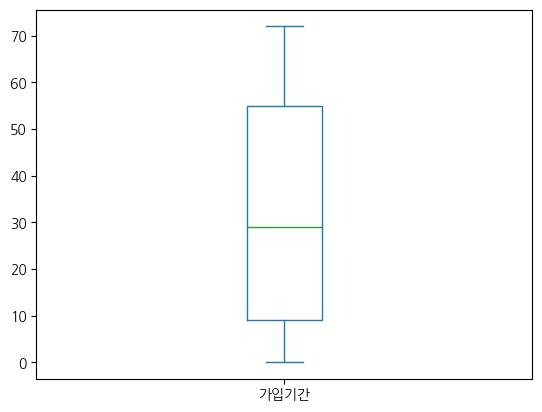

In [21]:
data['가입기간'].plot(kind='box')

<Axes: >

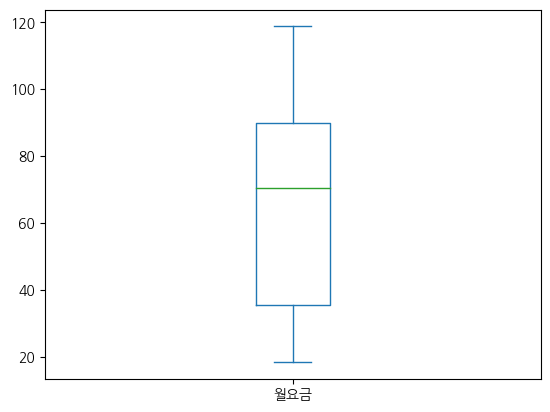

In [22]:
data['월요금'].plot(kind='box')

In [23]:
data['합산요금'] = data['합산요금'].astype(float)

In [24]:
data['합산요금'].dtype

dtype('float64')

<Axes: >

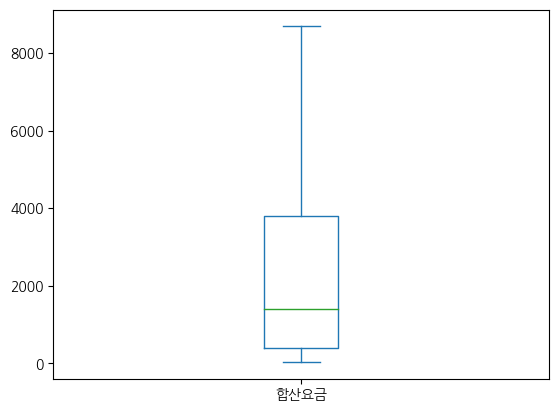

In [25]:
data['합산요금'].plot(kind='box')

In [27]:
cols4dummy = []
for cols in data.columns:
    if data[cols].dtype == 'O':
        print(cols,':', data[cols].unique(), data[cols].nunique())
        cols4dummy.append(cols)


회원ID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 7043
성별 : ['Female' 'Male'] 2
배우자 : ['Yes' 'No'] 2
피부양자 : ['No' 'Yes'] 2
전화서비스 : ['No' 'Yes'] 2
2회선이상 : ['No phone service' 'No' 'Yes'] 3
인터넷서비스 : ['DSL' 'Fiber optic' 'No'] 3
온라인보안 : ['No' 'Yes' 'No internet service'] 3
온라인백업 : ['Yes' 'No' 'No internet service'] 3
기기보호서비스 : ['No' 'Yes' 'No internet service'] 3
기술지원 : ['No' 'Yes' 'No internet service'] 3
스트리밍TV : ['No' 'Yes' 'No internet service'] 3
스트리밍Movies : ['No' 'Yes' 'No internet service'] 3
약정옵션 : ['Month-to-month' 'One year' 'Two year'] 3
온라인고지서 : ['Yes' 'No'] 2
지불수단 : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 4
이탈여부 : ['No' 'Yes'] 2


In [29]:
data = pd.get_dummies(data, columns=cols4dummy[1:], drop_first=True)

In [30]:
data.head(2)

,회원ID,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,...,스트리밍TV_Yes,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes
0,7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [32]:
X = data.drop(['회원ID', '이탈여부_Yes'], axis=1 )
y = data['이탈여부_Yes']

In [33]:
X

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍TV_No internet service,스트리밍TV_Yes,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,False,True,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,False,True,True,True,False,True,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,True,True,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True


In [34]:
from sklearn.cluster import KMeans

In [47]:
km = KMeans(n_clusters = 3)
km.fit(X)
result = km.labels_

C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [48]:
data['label'] = result
data.head()

,회원ID,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,...,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes,label
0,7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,...,False,False,False,False,True,False,True,False,0,1
1,5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,...,False,False,True,False,False,False,False,True,0,1
2,3668-QPYBK,0,2,53.85,108.15,True,False,False,True,False,...,False,False,False,False,True,False,False,True,1,1
3,7795-CFOCW,0,45,42.30,1840.75,True,False,False,False,True,...,False,False,True,False,False,False,False,False,0,1
4,9237-HQITU,0,2,70.70,151.65,False,False,False,True,False,...,False,False,False,False,True,False,True,False,1,1


In [41]:
data['이탈여부_Yes'] = data['이탈여부_Yes'].apply(lambda x: 1 if x == True else 0 )

In [42]:
from sklearn.metrics import accuracy_score

In [44]:
print(accuracy_score(data['이탈여부_Yes'], data['label']))

0.5284679823938663


In [56]:
data[data['label'] == 0].describe()

,고연령,가입기간,월요금,합산요금,이탈여부_Yes,label
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.0
mean,0.216733,64.384861,97.979243,6297.778685,0.137849,0.0
std,0.412183,7.415075,11.825757,1001.345310,0.344878,0.0
min,0.000000,43.000000,64.750000,4793.800000,0.000000,0.0
25%,0.000000,59.000000,89.550000,5478.075000,0.000000,0.0
50%,0.000000,66.000000,99.900000,6151.900000,0.000000,0.0
75%,0.000000,71.000000,107.375000,7044.175000,0.000000,0.0
max,1.000000,72.000000,118.750000,8684.800000,1.000000,0.0


In [57]:
data[data['label'] == 1].describe()

,고연령,가입기간,월요금,합산요금,이탈여부_Yes,label
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.0
mean,0.128352,18.213602,49.741810,686.056370,0.320163,1.0
std,0.334522,19.213577,27.151167,573.641708,0.466595,0.0
min,0.000000,0.000000,18.250000,18.800000,0.000000,1.0
25%,0.000000,3.000000,20.550000,159.900000,0.000000,1.0
50%,0.000000,12.000000,48.675000,534.875000,0.000000,1.0
75%,0.000000,25.000000,74.650000,1140.987500,1.000000,1.0
max,1.000000,72.000000,112.950000,1983.150000,1.000000,1.0


In [58]:
data[data['label'] == 2].describe()

,고연령,가입기간,월요금,합산요금,이탈여부_Yes,label
count,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.0
mean,0.207196,44.123449,77.810701,3280.360205,0.222705,2.0
std,0.405423,13.449781,17.990792,814.669932,0.416191,0.0
min,0.000000,19.000000,26.000000,1985.150000,0.000000,2.0
25%,0.000000,33.000000,63.887500,2553.612500,0.000000,2.0
50%,0.000000,43.000000,79.325000,3218.700000,0.000000,2.0
75%,0.000000,54.000000,93.212500,3974.950000,0.000000,2.0
max,1.000000,72.000000,116.250000,4786.150000,1.000000,2.0


In [59]:
km.inertia_

3706129806.0009065

# k-means의 k값을 얻기 위해 엘보우 메소드 사용하기

In [60]:
distance = []
for i in range(1,21):
    km=KMeans(n_clusters = i)
    km.fit(X)
    distance.append(km.inertia_)

C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

<Axes: >

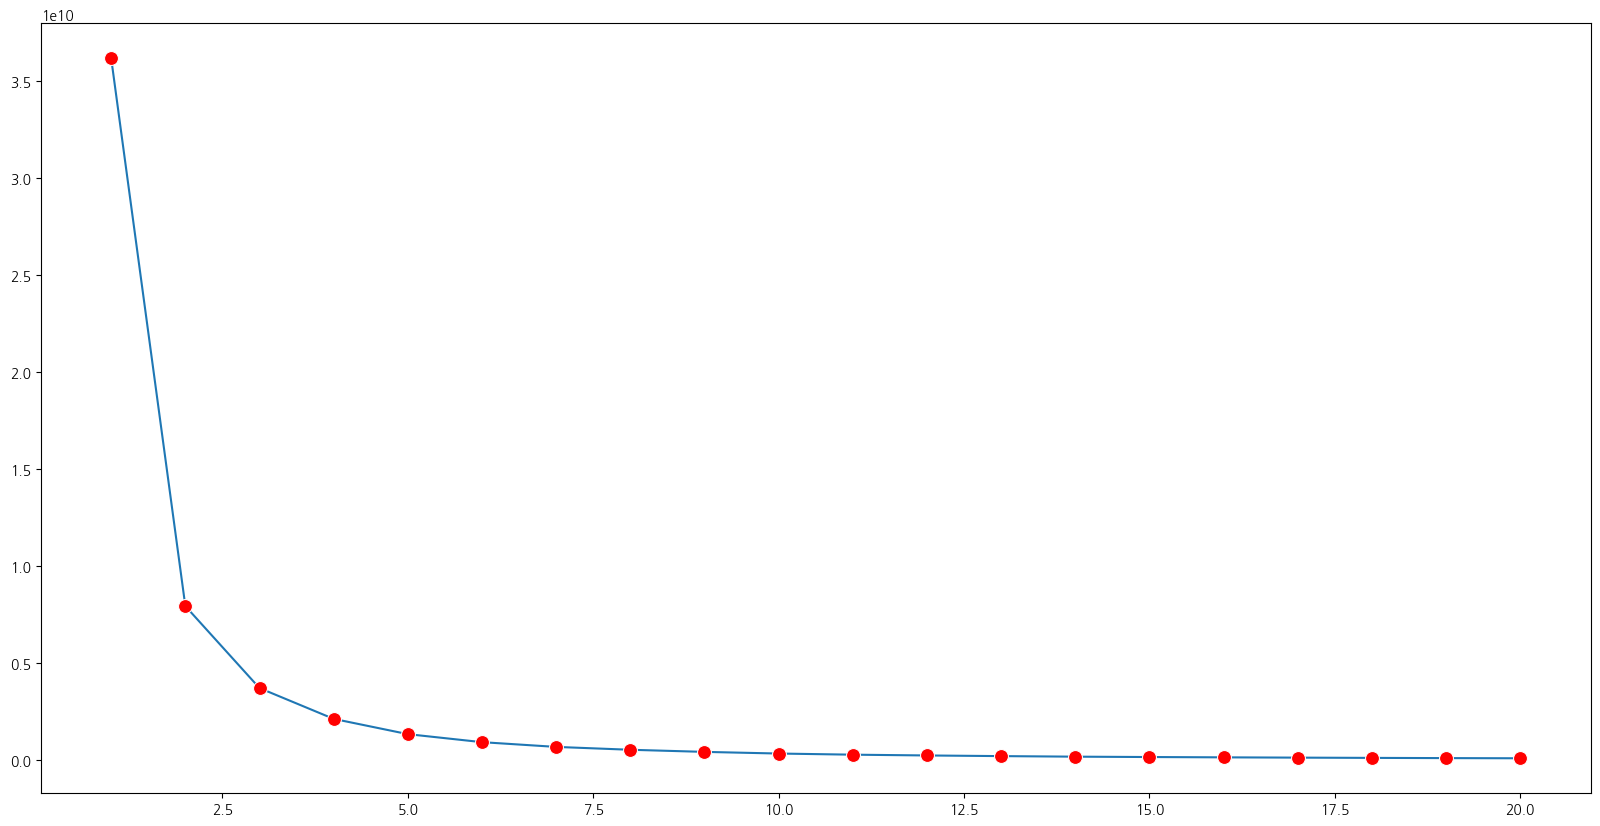

In [62]:
plt.figure(figsize=(20,10))
sns.lineplot(x = range(1,21), y =distance, marker='o', markersize=10, markerfacecolor='red')

# 데이터 프레임을 스케일링 후 재분석

In [63]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_scaled = mm.fit_transform(X)

In [68]:
km2 = KMeans(n_clusters=3)
km2.fit(X_scaled)
result2 = km2.labels_

C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [70]:
accuracy_score(result, result2) 

0.4828908135737612

In [71]:
distance2 = []
for i in range(1,21):
    km2=KMeans(n_clusters = i)
    km2.fit(X_scaled)
    distance2.append(km2.inertia_)

C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

<Axes: >

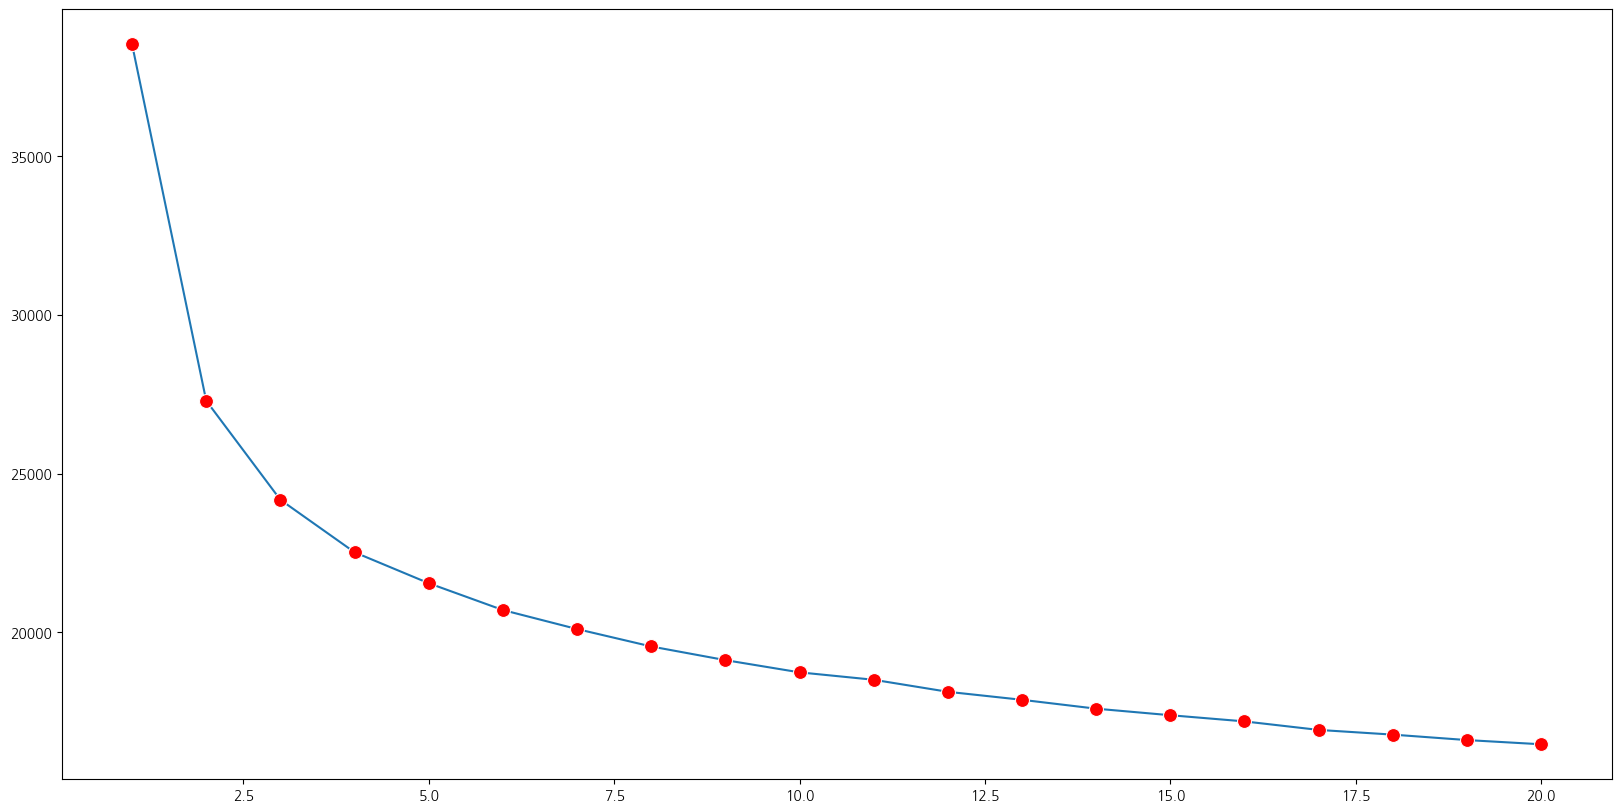

In [72]:
plt.figure(figsize=(20,10))
sns.lineplot(x = range(1,21), y =distance2, marker='o', markersize=10, markerfacecolor='red')

In [73]:
data['result2'] = result2

In [74]:
data.head(2)

,회원ID,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,...,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes,label,result2
0,7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,...,False,False,False,True,False,True,False,0,1,1
1,5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,...,False,True,False,False,False,False,True,0,1,1


In [76]:
data[data['result2']==0].describe()

,고연령,가입기간,월요금,합산요금,이탈여부_Yes,label,result2
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.0
mean,0.034076,30.547182,21.079194,662.690564,0.074050,1.001311,0.0
std,0.181484,24.356507,2.164221,555.527036,0.261938,0.036191,0.0
min,0.000000,0.000000,18.250000,18.800000,0.000000,1.000000,0.0
25%,0.000000,8.000000,19.700000,157.825000,0.000000,1.000000,0.0
50%,0.000000,25.000000,20.150000,519.200000,0.000000,1.000000,0.0
75%,0.000000,52.750000,20.900000,1108.650000,0.000000,1.000000,0.0
max,1.000000,72.000000,26.900000,2006.950000,1.000000,2.000000,0.0


In [77]:
data[data['result2']==1].describe()

,고연령,가입기간,월요금,합산요금,이탈여부_Yes,label,result2
count,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.0
mean,0.208416,16.938856,67.311111,1143.074425,0.443787,1.190335,1.0
std,0.406242,16.229473,19.841037,1150.112165,0.496912,0.417788,0.0
min,0.000000,1.000000,23.450000,23.450000,0.000000,0.000000,1.0
25%,0.000000,3.000000,50.550000,210.412500,0.000000,1.000000,1.0
50%,0.000000,12.000000,70.400000,763.525000,0.000000,1.000000,1.0
75%,0.000000,26.000000,83.900000,1760.850000,1.000000,1.000000,1.0
max,1.000000,71.000000,105.000000,5817.700000,1.000000,2.000000,1.0


In [79]:
data[data['label'] == 1].describe()

,고연령,가입기간,월요금,합산요금,이탈여부_Yes,label,result2
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.0,4176.000000
mean,0.128352,18.213602,49.741810,686.056370,0.320163,1.0,0.695163
std,0.334522,19.213577,27.151167,573.641708,0.466595,0.0,0.576369
min,0.000000,0.000000,18.250000,18.800000,0.000000,1.0,0.000000
25%,0.000000,3.000000,20.550000,159.900000,0.000000,1.0,0.000000
50%,0.000000,12.000000,48.675000,534.875000,0.000000,1.0,1.000000
75%,0.000000,25.000000,74.650000,1140.987500,1.000000,1.0,1.000000
max,1.000000,72.000000,112.950000,1983.150000,1.000000,1.0,2.000000


In [78]:
data[data['result2']==2].describe()

,고연령,가입기간,월요금,합산요금,이탈여부_Yes,label,result2
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.0
mean,0.184242,52.463434,88.561354,4673.990343,0.164040,0.909495,2.0
std,0.387760,18.129257,18.405480,1967.890501,0.370387,0.943798,0.0
min,0.000000,0.000000,35.400000,52.550000,0.000000,0.000000,2.0
25%,0.000000,41.000000,75.125000,3211.550000,0.000000,0.000000,2.0
50%,0.000000,57.000000,92.700000,4749.150000,0.000000,1.000000,2.0
75%,0.000000,68.000000,104.050000,6171.600000,0.000000,2.000000,2.0
max,1.000000,72.000000,118.750000,8684.800000,1.000000,2.000000,2.0


# DBSCAN (Density Based Spatial Clustering of Applications with Noise)
* 밀도 기반 군집화의 대표적인 알고리즘
* 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화 가능

### DBSCAN의 중요한 두 가지 파라미터
* 입실론주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
* 최소 데이터 갯수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 갯수

In [95]:
df = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/shopping-data.csv")

In [96]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [99]:
ss = StandardScaler()
df_scaled = ss.fit_transform(data)
df_scaled = pd.DataFrame(df_sacled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
df_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [111]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.5, min_samples=5)
result = model.fit_predict(df_scaled)
df_scaled['cluster'] = result
df_scaled.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,0


In [112]:
df_scaled['cluster'].unique()

array([ 0,  1, -1], dtype=int64)

In [113]:
df['cluster'] = result

In [114]:
df[df['cluster']==0].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,157.000000,157.000000,157.000000,157.000000,157.0
mean,82.789809,40.369427,52.490446,43.101911,0.0
std,51.492971,15.249332,21.811141,22.249225,0.0
min,1.000000,18.000000,15.000000,1.000000,0.0
25%,40.000000,26.000000,37.000000,28.000000,0.0
50%,79.000000,40.000000,54.000000,46.000000,0.0
75%,118.000000,51.000000,65.000000,55.000000,0.0
max,191.000000,70.000000,103.000000,99.000000,0.0


In [115]:
df[df['cluster']==1].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,35.000000,35.000000,35.000000,35.000000,35.0
mean,158.057143,32.742857,82.542857,82.800000,1.0
std,20.594035,3.890735,10.925800,9.498607,0.0
min,124.000000,27.000000,69.000000,63.000000,1.0
25%,141.000000,30.000000,74.500000,75.000000,1.0
50%,158.000000,32.000000,78.000000,86.000000,1.0
75%,175.000000,36.000000,87.500000,90.500000,1.0
max,194.000000,40.000000,113.000000,97.000000,1.0


In [117]:
df[df['cluster']==-1].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,8.000000,8.000000,8.000000,8.000000,8.0
mean,196.250000,35.750000,122.750000,46.875000,-1.0
std,2.815772,6.497252,11.510864,32.108911,0.0
min,192.000000,30.000000,103.000000,8.000000,-1.0
25%,194.500000,32.000000,118.250000,17.500000,-1.0
50%,196.500000,32.500000,123.000000,48.500000,-1.0
75%,198.250000,37.500000,128.750000,75.250000,-1.0
max,200.000000,47.000000,137.000000,83.000000,-1.0


In [108]:
df[df['cluster']==3].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,2.000000,2.00000,2.000000,2.000000,2.0
mean,197.000000,33.50000,123.000000,76.500000,3.0
std,1.414214,2.12132,4.242641,3.535534,0.0
min,196.000000,32.00000,120.000000,74.000000,3.0
25%,196.500000,32.75000,121.500000,75.250000,3.0
50%,197.000000,33.50000,123.000000,76.500000,3.0
75%,197.500000,34.25000,124.500000,77.750000,3.0
max,198.000000,35.00000,126.000000,79.000000,3.0


In [110]:
df[df['cluster']==-1].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,3.000000,3.000000,3.000000,3.0,3.0
mean,198.666667,35.666667,133.333333,43.0,-1.0
std,1.527525,8.144528,6.350853,35.0,0.0
min,197.000000,30.000000,126.000000,18.0,-1.0
25%,198.000000,31.000000,131.500000,23.0,-1.0
50%,199.000000,32.000000,137.000000,28.0,-1.0
75%,199.500000,38.500000,137.000000,55.5,-1.0
max,200.000000,45.000000,137.000000,83.0,-1.0


* min_samples =12로 고정 eps 값을 바꿔보며 군집화 실행

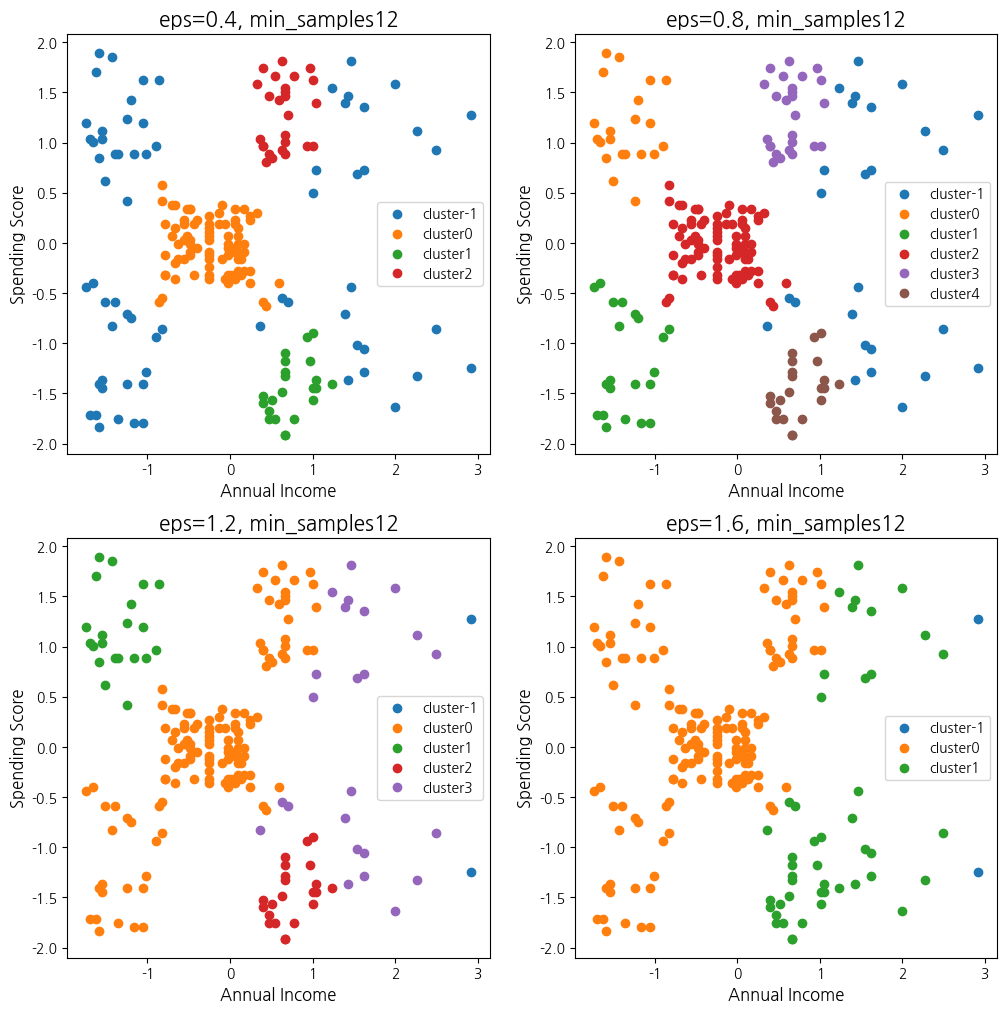

In [119]:
f, ax = plt.subplots(2,2)
f.set_size_inches((12,12))

for i in range(4):
    eps = 0.4 * (i+1)
    min_samples = 12
    
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(df_scaled)
    df_scaled['cluster'] = model.fit_predict(df_scaled)
    
    for j in range(-1, df_scaled['cluster'].max() +1):
        ax[i // 2, i % 2].scatter(df_scaled.loc[df_scaled['cluster']== j, 'Annual Income (k$)'], df_scaled.loc[df_scaled['cluster']== j, 'Spending Score (1-100)'],
                                 label = 'cluster' + str(j))
        ax[ i //2, i %2].legend()
        ax[ i //2, i %2].set_title(f'eps={eps:.1f}, min_samples{min_samples}', size=15)
        ax[ i //2, i %2].set_xlabel('Annual Income', size=12)
        ax[ i //2, i %2].set_ylabel('Spending Score', size=12)
plt.show()  